In [0]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset/train.csv')

df_predict = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset/predict.csv')

### Apart from we have done before, we reconsider this classification problem
As we need to help a life insurance company by advices for their contracts, and we think the number of levels of risk are too many and not necessary. As we only need to tell if this contract is signable or not. 

Text(0.5, 1.0, 'Distribution of rows by response categories')

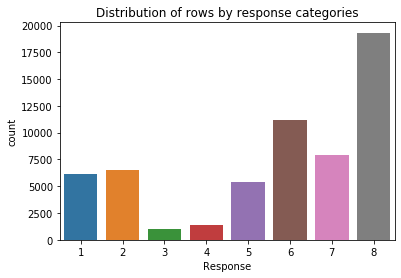

In [0]:
sns.countplot(x=df_train.Response)
plt.title("Distribution of rows by response categories")

In [0]:
# So we consider the class 6,7,8 as the contracts can be very risky and not good for their company.
# However, the class 1,2,3,4,5 are the levels can be accept by the company.

### Transformation

Unique values in Target Variable: int64
Unique values in Target Variable: [1 0]
Total Number of unique values : 2


Text(0.5, 1.0, 'Distribution of rows by response categories')

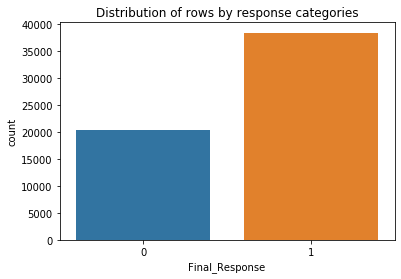

In [0]:
def new_response(row):
    if (row['Response']<=5) & (row['Response']>=0):
        val=0
    elif (row['Response']>=6) & (row['Response']<=8):
        val=1
    else:
        val=-1
    return val


#create a copy of original dataset
df_train_transformed = df_train.copy()

#create a new column
df_train_transformed['Final_Response']=df_train_transformed.apply(new_response,axis=1)


#print unique values of target variable
print("Unique values in Target Variable: {}".format(df_train_transformed.Final_Response.dtype))
print("Unique values in Target Variable: {}".format(df_train_transformed.Final_Response.unique()))
print("Total Number of unique values : {}".format(len(df_train_transformed.Final_Response.unique())))

#distribution plot for target classes
sns.countplot(x=df_train_transformed.Final_Response).set_title('Distribution of rows by response categories')

In [0]:
df_train_transformed.drop(axis=1, labels=['Response'], inplace=True)
df_train_transformed.rename(columns={"Final_Response":"Response"},inplace=True)

In [0]:
def missing_value_info(df):
    total_num = df.shape[0]
    null_counts = df.notnull().sum()[df.notnull().sum() != total_num].sort_values(ascending=False)
    cols_with_null = (total_num - null_counts) / total_num * 100
    return cols_with_null

def dataset_type_info(df):
    columns_df=pd.DataFrame({'column_names':df.columns,'datatypes':df.dtypes},index=None)
    x=columns_df.groupby(by=['datatypes']).count()
    x.reset_index(inplace=True)
    x.rename(columns={"column_names":"Number_of_columns"},inplace=True)
    lst=[]
    for data_type in x.datatypes:
        v=list(df.select_dtypes(include=data_type).columns)
        lst.append(v)
        x['Column_Names']=pd.Series(lst)
    return x

In [0]:
missing_value_info(df_train_transformed)

Employment_Info_1       0.032268
Employment_Info_4      11.407755
Medical_History_1      14.960683
Employment_Info_6      18.262258
Family_Hist_4          32.317726
Insurance_History_5    42.764219
Family_Hist_2          48.270240
Family_Hist_3          57.662064
Family_Hist_5          70.399620
InsuredInfo_9          74.940983
Medical_History_15     75.097230
InsuredInfo_8          87.919702
Medical_History_24     93.593859
Medical_History_32     98.131825
Medical_History_10     99.064214
dtype: float64

In [0]:
cols_2_delete = missing_value_info(df_train_transformed)[missing_value_info(df_train_transformed) > 50].index.to_list()
df_train_transformed = df_train_transformed.drop(cols_2_delete, axis=1)

In [0]:
df_train_transformed = df_train_transformed.drop("InsuredInfo_7", axis=1) # Gender column
dataset_type_info(df_train_transformed)

,datatypes,Number_of_columns,Column_Names
0,int64,107,"[Product_Info_1, Product_Info_3, Product_Info_..."
1,float64,12,"[Product_Info_4, Ins_Age, Ht, Wt, BMI, Employm..."
2,object,1,[Product_Info_2]


In [0]:
le = LabelEncoder()
df_train_transformed['Product_Info_2_en'] = le.fit_transform(df_train_transformed['Product_Info_2'])
df_train_transformed.drop(axis=1, labels=['Product_Info_2'], inplace=True)

In [0]:
cols_with_null = missing_value_info(df_train_transformed)
for index in cols_with_null.index:
    median = df_train_transformed[index].median()
    df_train_transformed[index] = df_train_transformed[index].fillna(median)

In [0]:
missing_value_info(df_train_transformed)

Series([], dtype: float64)

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn import ensemble
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,accuracy_score,precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

In [0]:
y = df_train_transformed.Response
X = df_train_transformed.drop(labels=['Response'],axis=1)

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=.30,random_state=0)

# print shape of dataset
print("Shape of X_train dataset {}".format(X_train.shape))
print("Shape of X_test dataset {}".format(X_valid.shape))

print("Shape of y_train dataset {}".format(y_train.shape))
print("Shape of y_valid dataset {}".format(y_valid.shape))

Shape of X_train dataset (41216, 119)
Shape of X_test dataset (17665, 119)
Shape of y_train dataset (41216,)
Shape of y_valid dataset (17665,)


In [0]:
#set seed for same results everytime
seed=0

#declare the models
dt=DecisionTreeClassifier(random_state=seed)
rf=RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=seed)
lr=LogisticRegression(random_state=seed)
adb=ensemble.AdaBoostClassifier(random_state=seed, n_estimators=200, learning_rate=0.1)
gbc=ensemble.GradientBoostingClassifier(n_estimators=500,random_state=seed, learning_rate=0.1)
xgb=XGBClassifier(n_estimators=900, learning_rate=0.1, random_state=seed)
svc=SVC(kernel='linear', C=1, gamma=0.1, random_state=seed)


#create a list of models
#models=[dt,rf,lr,adb,gbc,xgb,svc]
models = [rf, xgb, gbc]


def score_model(X_train,y_train,X_valid,y_valid):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0
    #read model one by one
    for model in models:
        model.fit(X_train,y_train)
        y_pred=model.predict(X_valid)
        
        #compute metrics
        train_accuracy=model.score(X_train,y_train)
        test_accuracy=model.score(X_valid,y_valid)
        
        p_score=metrics.precision_score(y_valid,y_pred, average='weighted')
        r_score=metrics.recall_score(y_valid,y_pred, average='weighted')
        f1_score=metrics.f1_score(y_valid,y_pred, average='weighted')
        
        
        #insert in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"Precision"]=round(p_score,2)
        df.loc[i,"Recall"]=round(r_score,2)
        df.loc[i,"Train_Accuracy"]=round(train_accuracy,2)
        df.loc[i,"Test_Accuracy"]=round(test_accuracy,2)
        df.loc[i,"F1_Score"]=round(f1_score,2)
        
        
        i+=1
    
    #sort values by accuracy
    df.sort_values(by=['F1_Score'],ascending=False,inplace=True)
    return(df)


In [0]:
report=score_model(X_train, y_train, X_valid, y_valid)
report

,Model_Name,Precision,Recall,Train_Accuracy,Test_Accuracy,F1_Score
4,GradientBoostingClassifier,0.80,0.80,0.82,0.80,0.79
5,XGBClassifier,0.80,0.80,0.83,0.80,0.79
1,RandomForestClassifier,0.80,0.79,0.81,0.79,0.77
3,AdaBoostClassifier,0.79,0.78,0.78,0.78,0.77
6,SVC,0.77,0.77,0.76,0.77,0.76
0,DecisionTreeClassifier,0.72,0.72,1.00,0.72,0.72
2,LogisticRegression,0.69,0.70,0.70,0.70,0.68


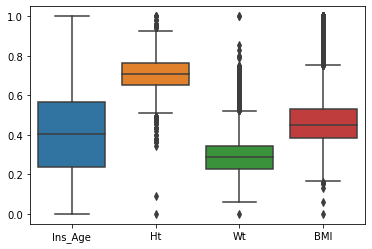

In [0]:
# Exploring Numerical variables
numerical_cols=["Ins_Age","Ht","Wt","BMI"]

sns.boxplot(data=df_train_transformed[numerical_cols])

In [0]:
#function to remove outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


df_train_noOut = remove_outlier(df_train_transformed,'BMI')
df_train_noOut = remove_outlier(df_train_noOut,'Wt')
df_train_noOut = remove_outlier(df_train_noOut,'Ht')

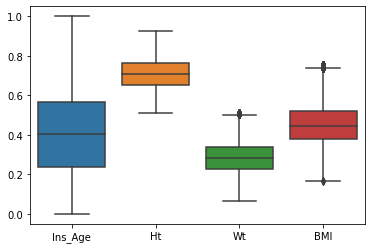

In [0]:
sns.boxplot(data=df_train_noOut[numerical_cols])

In [0]:
X_noOut = df_train_noOut.drop('Response', axis=1)
y_noOut = df_train_noOut['Response']

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(X_noOut,y_noOut,test_size=.30,random_state=0)

# print shape of dataset
print("Shape of X_train dataset {}".format(X_train.shape))
print("Shape of X_test dataset {}".format(X_valid.shape))

print("Shape of y_train dataset {}".format(y_train.shape))
print("Shape of y_valid dataset {}".format(y_valid.shape))


Shape of X_train dataset (39810, 119)
Shape of X_test dataset (17062, 119)
Shape of y_train dataset (39810,)
Shape of y_valid dataset (17062,)


In [0]:
# We will only focus on the models more accurate
# RandomForest GradientBoostin Xgboost
# seed = 0
report=score_model(X_train, y_train, X_valid, y_valid)
report

,Model_Name,Precision,Recall,Train_Accuracy,Test_Accuracy,F1_Score
1,XGBClassifier,0.79,0.80,0.83,0.80,0.79
2,GradientBoostingClassifier,0.79,0.80,0.82,0.80,0.78
0,RandomForestClassifier,0.78,0.78,0.80,0.78,0.75


### KFold Cross Validation and Confusion Matrix
  - Emilinate the special situation's influence
  - It gives the number of correct and incorrect classification made by the classifier

In [0]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
models = [rf, xgb, gbc]
classifiers = ['Random Forest', 'Xgboost', 'GradientBoosting']
for model in models:
  cv_result = cross_val_score(model, X_noOut, y_noOut, cv=kfold, scoring="accuracy")
  xyz.append(cv_result.mean())
  std.append(cv_result.std())
  accuracy.append(cv_result)

df_final_models = pd.DataFrame({'CV Mean':xyz, 'std':std},index=classifiers)
df_final_models

,CV Mean,std
Random Forest,0.780226,0.004643
Xgboost,0.797704,0.004089
GradientBoosting,0.797035,0.003419


Text(0.5, 1.0, 'Box plot of the KFold Validation')

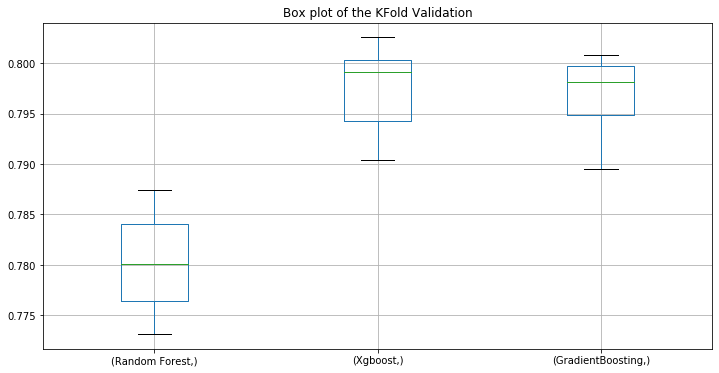

In [0]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()
plt.title("Box plot of the KFold Validation")

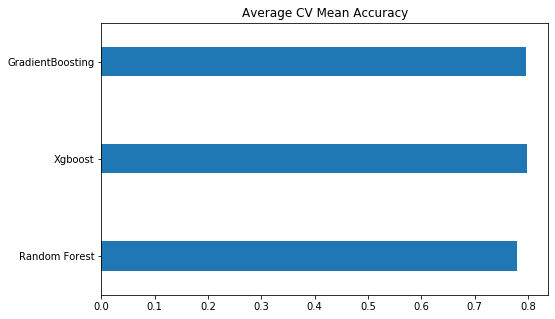

In [0]:
df_final_models['CV Mean'].plot.barh(width=0.3)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

In [0]:
report=score_model(X_train, y_train, X_valid, y_valid)
report

,Model_Name,Precision,Recall,Train_Accuracy,Test_Accuracy,F1_Score
1,XGBClassifier,0.79,0.80,0.83,0.80,0.79
2,GradientBoostingClassifier,0.79,0.80,0.82,0.80,0.78
0,RandomForestClassifier,0.78,0.78,0.80,0.78,0.75


Text(0.5, 1, 'Matrix for GradientBoosting')

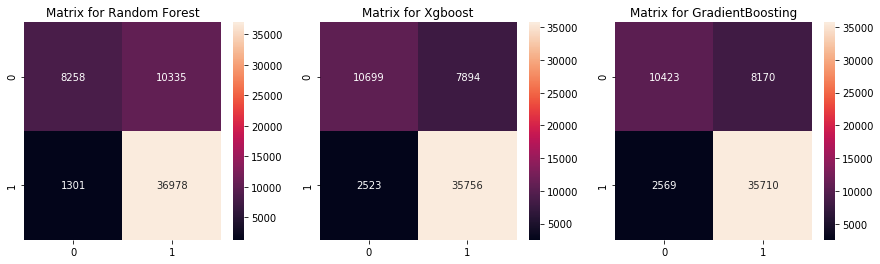

In [0]:
f, ax = plt.subplots(1,3,figsize=(15,4))
y_pred = rf.predict(X_noOut)
sns.heatmap(confusion_matrix(y_noOut,y_pred), ax=ax[0], annot=True, fmt='2.0f')
ax[0].set_title('Matrix for Random Forest')

y_pred = xgb.predict(X_noOut)
sns.heatmap(confusion_matrix(y_noOut,y_pred), ax=ax[1], annot=True, fmt='2.0f')
ax[1].set_title('Matrix for Xgboost')

y_pred = gbc.predict(X_noOut)
sns.heatmap(confusion_matrix(y_noOut,y_pred), ax=ax[2], annot=True, fmt='2.0f')
ax[2].set_title('Matrix for GradientBoosting')